In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from matplotlib.ticker import LogFormatter

In [2]:
alg_label = ["Original",
             "Lqdags"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]
#queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]
#queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Tr1","Tr2"]

In [3]:
# box plots for each query
# TDO hacer un for para cada query y función y tamaño k
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]

datasets = []
file = "results-time-lqdags.csv"
file_lqdags = "results-time.csv"
print(file)

original = pd.read_csv(f'../../original/{file}',delimiter=';')
original = original.head(4)



lqdags = pd.read_csv(f'../../lqdags/{file_lqdags}',delimiter=';')


datasets = [original,
               lqdags]

#   print(i)
for j,query in enumerate(queries_label):
    data[j] = [original[query],
                     lqdags[query]] 

results-time-lqdags.csv


In [4]:
datasets[0]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,0.048888,1.117227,0.000909,0.009742,0.389485,0.002162,0.054270,0.013548,0.039615,0.005863,0.008470,0.013925,0.000871,0.050743,0.102832,0.000610,0.003386
1,10,0.085268,2.050649,0.024858,0.038661,0.809396,0.005257,0.074197,0.026933,0.116632,0.001453,0.023909,0.061542,0.002496,0.103186,0.136819,0.001496,0.004213
2,100,0.100623,2.496393,0.007060,0.095524,1.425394,0.007588,0.081514,0.083136,0.088549,0.004217,0.035347,0.062837,0.006013,0.173976,0.136675,0.001617,0.004294
3,1000,0.134749,3.167293,0.009065,0.047345,1.446185,0.006569,0.082357,0.034407,0.088506,0.005512,0.037892,0.065561,0.013773,0.186662,0.135892,0.001658,0.004839


In [5]:
datasets[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [6]:
colors = ['#de2d26', '#3f007d']#, 'darkturquoise', 'mediumspringgreen', 'lime']
#linestyles = ['--', ':']  # Different patterns

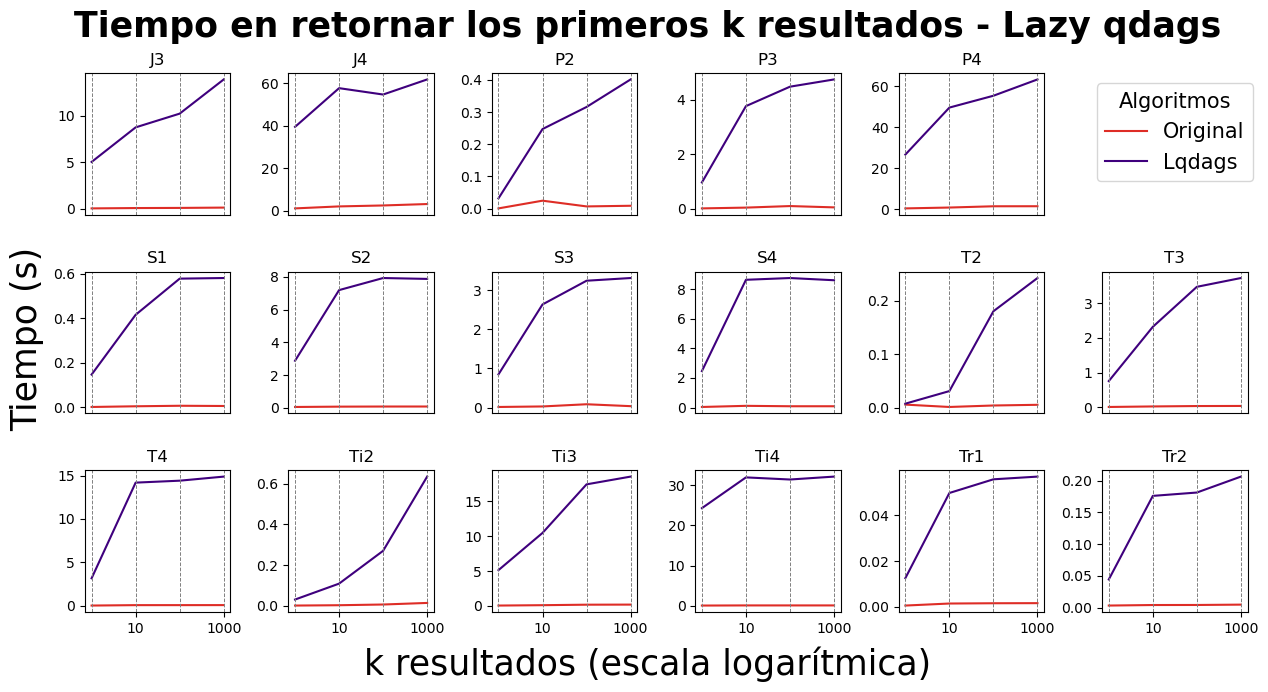

In [9]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.4, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])



for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != t4 and query != t4 and query != ti2 and query != ti3 and query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='upper center',
    fontsize=15,  # Increase font size for the legend
    title='Algoritmos',  # Add title
    title_fontsize=15  # Set font size for the title
)


fig.text(0.5, 0.02, 'k resultados (escala logarítmica)', ha='center', fontsize=25)
fig.text(0.075, 0.5, 'Tiempo (s)', va='center', rotation='vertical', fontsize=25)
# Add a title to the entire figure
fig.suptitle('Tiempo en retornar los primeros k resultados - Lazy qdags', fontsize=25, fontweight='bold', y=0.97)



plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-ppt.pdf')

plt.show()
 

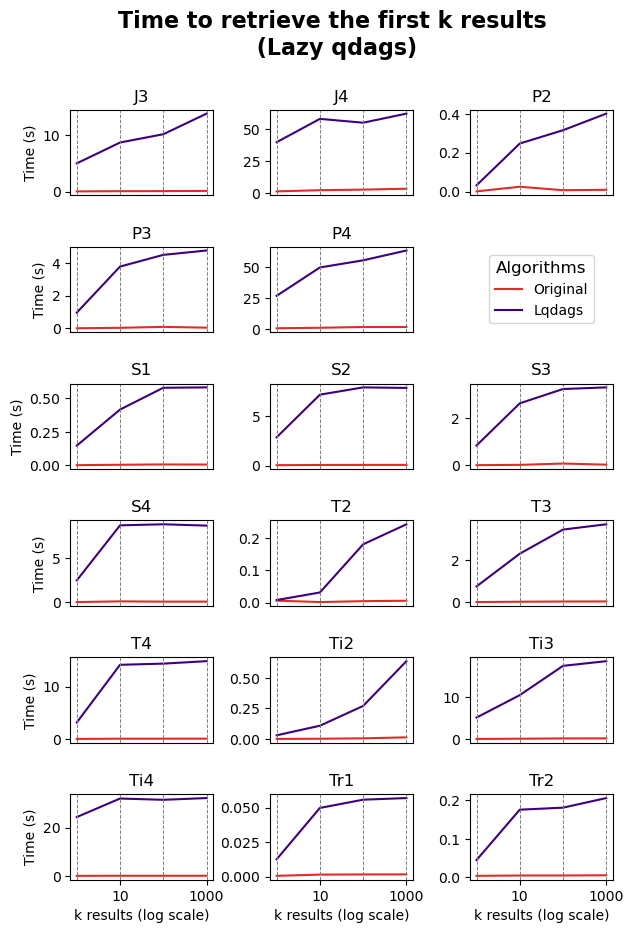

In [29]:
# Crear la figura
fig = plt.figure(figsize=(7, 10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(6, 3, figure=fig, hspace=0.6, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[2, 0])
s2 = fig.add_subplot(gs[2, 1])
s3 = fig.add_subplot(gs[2,2])

s4 = fig.add_subplot(gs[3, 0])
t2 = fig.add_subplot(gs[3, 1])
t3 = fig.add_subplot(gs[3, 2])

t4 = fig.add_subplot(gs[4, 0])
ti2 = fig.add_subplot(gs[4, 1])
ti3 = fig.add_subplot(gs[4, 2])

ti4 = fig.add_subplot(gs[5, 0])
tr1 = fig.add_subplot(gs[5, 1])
tr2 = fig.add_subplot(gs[5, 2])

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
s4.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')
ti4.set_ylabel('Time (s)')

ti4.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != tr1 and query != tr2 and query != ti4):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=0.98)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-tesis.pdf')

plt.show()
 

In [128]:
## SECOND SCENARIO --> V1000

In [10]:

alg_label = ["Original",
            "Lqdags"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t4","ti2","ti3"] # "s3", "t3","ti4"

In [11]:
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets_v1000 =[]

file = "results-time-lqdags.csv"
file_lqdags = "results-time.csv"
#print(file)

original = pd.read_csv(f'../../query1000results/original/{file}',delimiter=';')
original = original.head(4)
# Drop columns where all values are zero
original = original.loc[:, (original != 0).any(axis=0)]

lqdags = pd.read_csv(f'../../query1000results/lqdags/{file_lqdags}',delimiter=';')
# Drop columns where all values are zero
lqdags = lqdags.loc[:, (lqdags != 0).any(axis=0)]


datasets_v1000 = [original,
                     lqdags]

#   print(i)
for j,query in enumerate(queries_label_v1000):
    data_v1000[j] = [original[query],
                     lqdags[query]]
        

In [12]:
datasets_v1000[0]

,k,j3,j4,p2,p3,p4,s3,t2,t4,ti2,ti3
0,1,0.003076,0.002319,0.000263,0.004106,0.055954,0.000191,0.000350,0.000259,0.000603,0.114863
1,10,0.003640,0.002746,0.001336,0.006876,0.359105,0.000226,0.000557,0.000738,0.000833,0.166795
2,100,0.010488,0.031788,0.001808,0.010989,0.382161,0.000402,0.007174,0.001486,0.002441,0.180945
3,1000,0.075646,0.113154,0.007065,0.023086,0.368990,0.002167,0.013592,0.024311,0.027974,0.431987


In [13]:
datasets_v1000[1]

,k,j3,j4,p2,p3,p4,s3,t2,t4,ti2,ti3
0,1,0.242334,0.510073,0.000802,0.348153,13.2522,0.000290,0.000429,0.002270,0.015068,12.129622
1,10,0.275848,0.587248,0.004839,0.630459,85.0726,0.001137,0.011131,0.099459,0.023882,17.234050
2,100,0.971293,7.286810,0.044340,1.037821,168.5490,0.010783,0.325413,0.269250,0.096824,60.468381
3,1000,7.587172,80.018597,0.292624,1.908325,250.1470,0.106358,0.606055,5.513610,1.279085,98.553738


In [133]:
datasets_v1000[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [9]:
colors = ['#de2d26', '#3f007d']#, 'darkturquoise', 'mediumspringgreen', 'lime']
#linestyles = ['--', ':']  # Different patterns

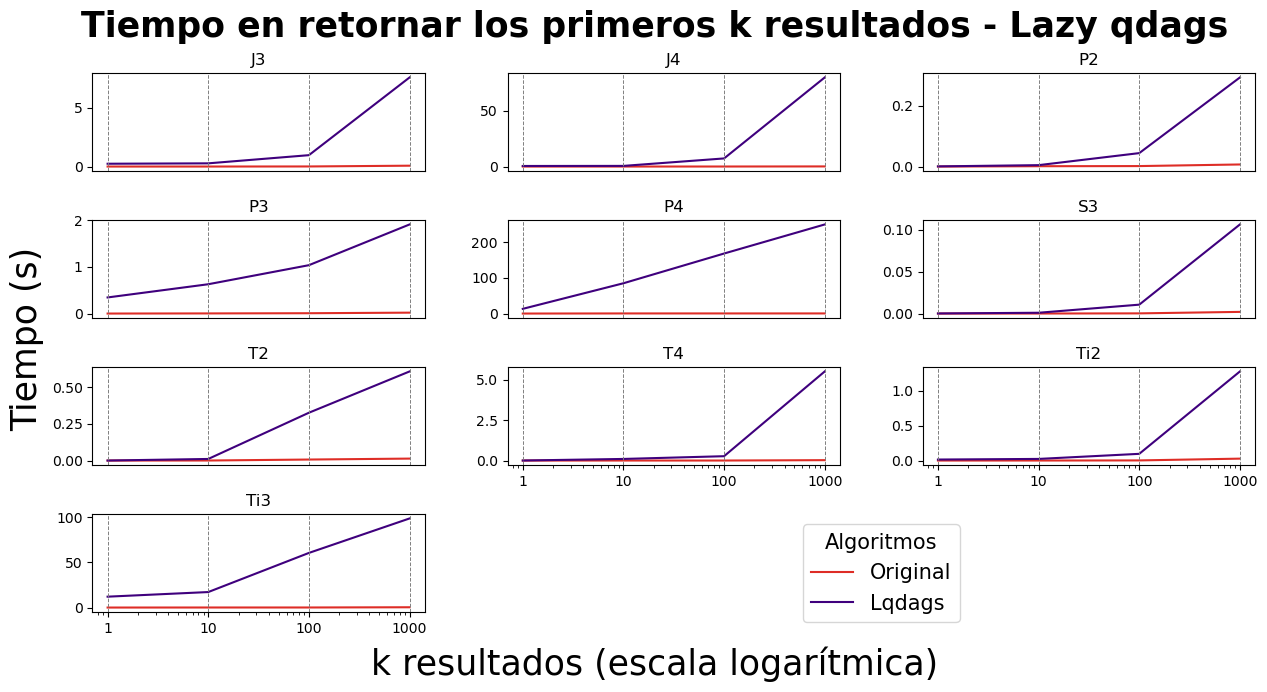

In [14]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.5, wspace=0.25)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t4 = fig.add_subplot(gs[2, 1])
ti2 = fig.add_subplot(gs[2, 2])
ti3 = fig.add_subplot(gs[3, 0])
color_legend = fig.add_subplot(gs[3, 1:3]) # Space for the legend
color_legend.axis('off')  # Hide the axis



for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != ti2 and query != ti3 and query != t4):
        query.axes.get_xaxis().set_visible(False)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='upper center',
    fontsize=15,  # Increase font size for the legend
    title='Algoritmos',  # Add title
    title_fontsize=15  # Set font size for the title
)


fig.text(0.5, 0.02, 'k resultados (escala logarítmica)', ha='center', fontsize=25)
fig.text(0.07, 0.5, 'Tiempo (s)', va='center', rotation='vertical', fontsize=25)
# Add a title to the entire figure
fig.suptitle('Tiempo en retornar los primeros k resultados - Lazy qdags', fontsize=25, fontweight='bold', y=0.97)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time-ppt.pdf')

plt.show()
 

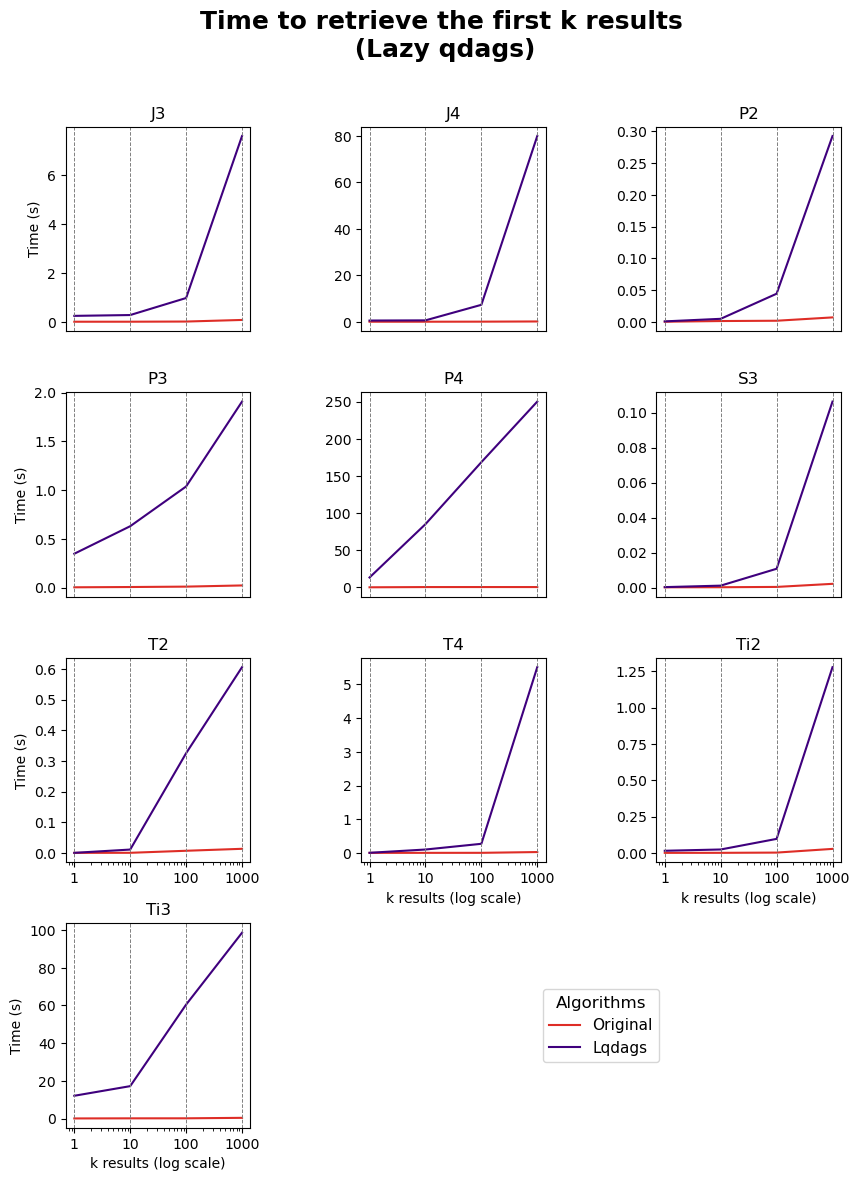

In [136]:
# version tesis
# Crear la figura
fig = plt.figure(figsize=(10,13))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.3, wspace=0.6)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

t2 = fig.add_subplot(gs[2, 0])
#t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 1])
ti2 = fig.add_subplot(gs[2, 2])

ti3 = fig.add_subplot(gs[3, 0])
color_legend = fig.add_subplot(gs[3, 1:3]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
t2.set_ylabel('Time (s)')
ti3.set_ylabel('Time (s)')

t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title_v1000[i])
        query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
        query.xaxis.set_major_formatter(LogFormatter())
        #query.yaxis.set_major_formatter(LogFormatter())
        if(query != ti2 and query != t2 and query != t4 and query != ti3):
            query.axes.get_xaxis().set_visible(False)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=11,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold',y=0.97)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time-tesis.pdf')

plt.show()
 